In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Parte 1

Ejercicio1

<function matplotlib.pyplot.show(close=None, block=None)>

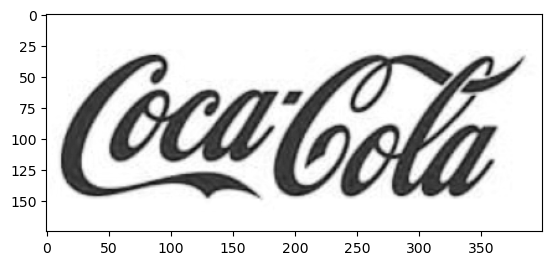

In [2]:
pattern= cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/template/pattern.png', 0)
plt.imshow(pattern, cmap = 'gray')
plt.show

In [3]:
w_original, h_original = pattern.shape[::-1]
print(f'Width: {w_original}\nHeight: {h_original}')

Width: 400
Height: 175


In [4]:
def deteccion_logo(template_gray, img, meth):
    img_salida = img.copy()
    img_gray = cv.cvtColor(img_salida, cv.COLOR_BGR2GRAY)
    
    edges = cv.Canny(img_gray, threshold1=200, threshold2=700)
    
    template_resized = template_gray.copy()
        
    scales = np.linspace(0.1, 3, 30)
    maximo = 0
    final_scale = scales[0]
    for scale in scales:
        template_resized = cv.resize(template_gray, None, fx=scale, fy=scale)
        template_resized = cv.Canny(template_resized, threshold1=0, threshold2=500)
        w, h = template_resized.shape[::-1]
        
        method = eval(meth)
        try:
            res = cv.matchTemplate(edges, template_resized, method)
        except:
            break
        _, max_val, _, max_loc = cv.minMaxLoc(res)
        
        if max_val >= maximo:
            maximo = max_val
            final_scale = scale
    
    
    template_resized = cv.resize(template_gray, None, fx=final_scale, fy=final_scale)
    w, h = template_resized.shape[::-1]
        
    method = eval(meth)
    res = cv.matchTemplate(edges, template_resized, method)
        
    _, max_val, _, max_loc = cv.minMaxLoc(res)
    
    
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
                top_left = min_loc
    else:
        top_left = max_loc
            
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida, top_left, bottom_right, 0, 5)    
    
    plt.figure()

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Resultado de coincidencia'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(img_salida)
    plt.title('Punto detectado'), plt.xticks([]), plt.yticks([])
    plt.show()

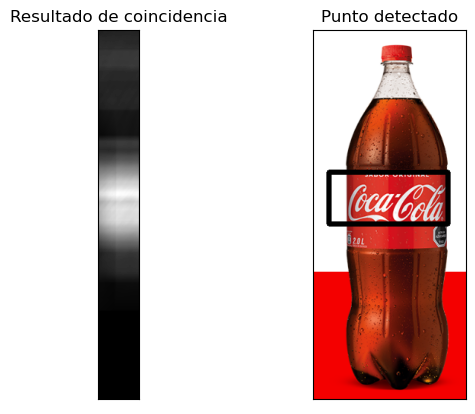

In [5]:
coca_logo_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_logo_1.png')
coca_logo_1 = cv.cvtColor(coca_logo_1, cv.COLOR_BGR2RGB)
deteccion_logo(pattern, coca_logo_1, 'cv.TM_CCORR')


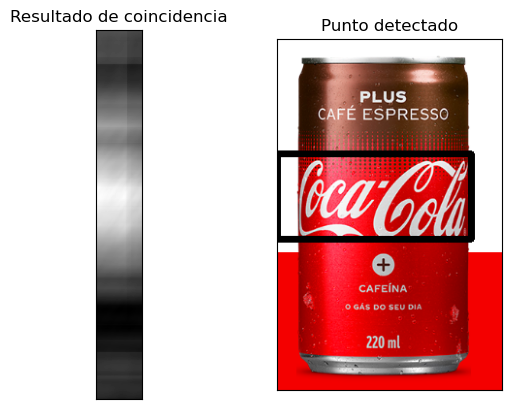

In [6]:
coca_logo_2 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_logo_2.png')
coca_logo_2 = cv.cvtColor(coca_logo_2, cv.COLOR_BGR2RGB)
deteccion_logo(pattern, coca_logo_2, 'cv.TM_CCORR')

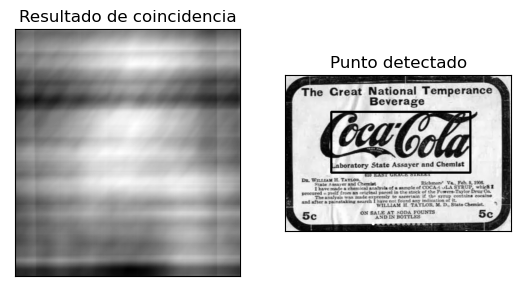

In [6]:
coca_retro_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_retro_1.png')
coca_retro_1 = cv.cvtColor(coca_retro_1, cv.COLOR_BGR2RGB)
deteccion_logo(pattern, coca_retro_1, 'cv.TM_CCORR')

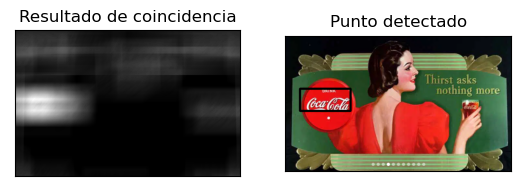

In [7]:
coca_retro_2 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_retro_2.png')
coca_retro_2 = cv.cvtColor(coca_retro_2, cv.COLOR_BGR2RGB)
deteccion_logo(pattern, coca_retro_2, 'cv.TM_CCORR')

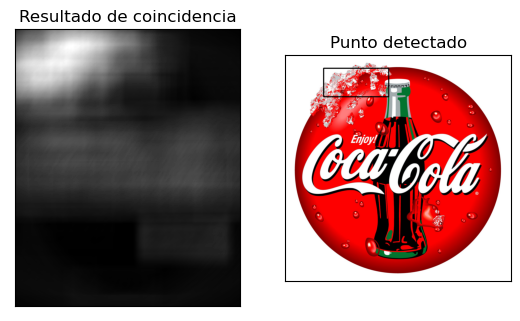

In [8]:
COCA_COLA_LOGO = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/COCA-COLA-LOGO.jpg')
COCA_COLA_LOGO = cv.cvtColor(COCA_COLA_LOGO, cv.COLOR_BGR2RGB)
deteccion_logo(pattern, COCA_COLA_LOGO, 'cv.TM_CCORR')

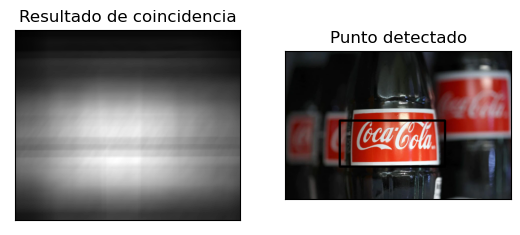

In [9]:
logo_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/logo_1.png')
logo_1 = cv.cvtColor(logo_1, cv.COLOR_BGR2RGB)
deteccion_logo(pattern, logo_1, 'cv.TM_CCORR')

Ejercicio 2

In [118]:
def deteccion_logos(template, img, meth):
    img_salida = img.copy()
    img_gray = cv.cvtColor(img_salida, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(img_gray, threshold1=200, threshold2=700)
    
    scale = template.shape[0]/img_salida.shape[0]
    
    template  = cv.resize(template, None, fx=scale, fy=scale)
    template = cv.Canny(template, threshold1=0, threshold2=500)
        
    w, h = template.shape[::-1]
    
    method = eval(meth)
    
    res = cv.matchTemplate(edges, template, method)
    maximo = max(res.flatten())
    res = res/maximo
    
    umbral = 0.8

    loc = np.where( res >= umbral)
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_salida, pt, (pt[0] + w, pt[1] + h), (100,255,255), 2)
    
    plt.figure()

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()

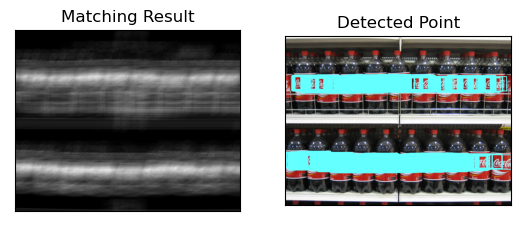

In [119]:
coca_multi = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_multi.png')
coca_multi = cv.cvtColor(coca_multi, cv.COLOR_BGR2RGB)
deteccion_logos(pattern, coca_multi, 'cv.TM_CCORR')

Ejercicio 3

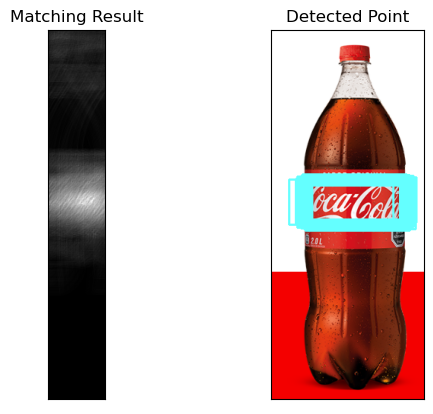

In [120]:
coca_logo_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_logo_1.png')
coca_logo_1 = cv.cvtColor(coca_logo_1, cv.COLOR_BGR2RGB)
deteccion_logos(pattern, coca_logo_1, 'cv.TM_CCORR')

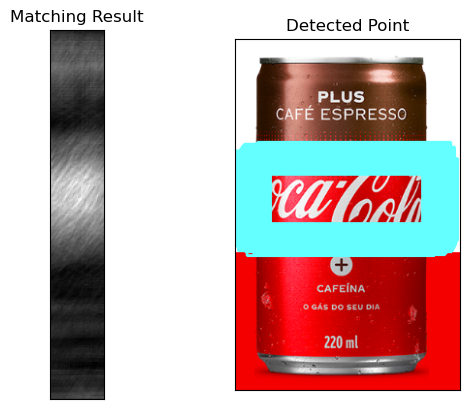

In [121]:
coca_logo_2 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_logo_2.png')
coca_logo_2 = cv.cvtColor(coca_logo_2, cv.COLOR_BGR2RGB)
deteccion_logos(pattern, coca_logo_2, 'cv.TM_CCORR')

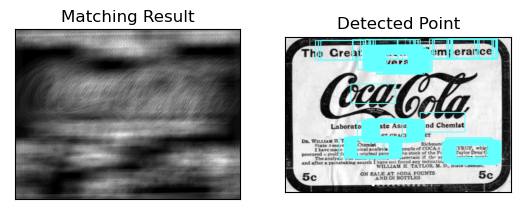

In [122]:
coca_retro_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_retro_1.png')
coca_retro_1 = cv.cvtColor(coca_retro_1, cv.COLOR_BGR2RGB)
deteccion_logos(pattern, coca_retro_1, 'cv.TM_CCORR')

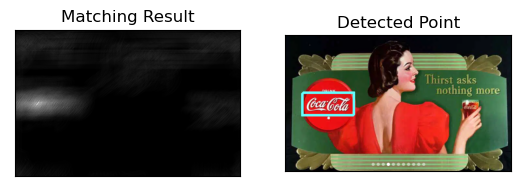

In [123]:
coca_retro_2 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_retro_2.png')
coca_retro_2 = cv.cvtColor(coca_retro_2, cv.COLOR_BGR2RGB)
deteccion_logos(pattern, coca_retro_2, 'cv.TM_CCORR')

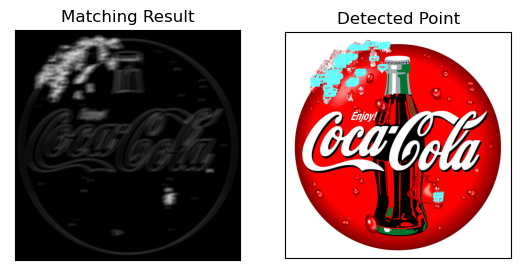

In [124]:
COCA_COLA_LOGO = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/COCA-COLA-LOGO.jpg')
COCA_COLA_LOGO = cv.cvtColor(COCA_COLA_LOGO, cv.COLOR_BGR2RGB)
deteccion_logos(pattern, COCA_COLA_LOGO, 'cv.TM_CCORR')

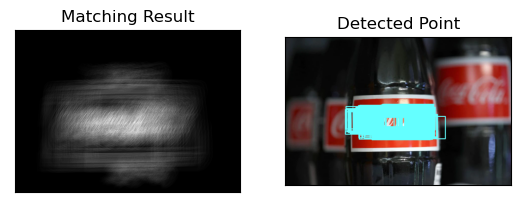

In [125]:
logo_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/logo_1.png')
logo_1 = cv.cvtColor(logo_1, cv.COLOR_BGR2RGB)
deteccion_logos(pattern, logo_1, 'cv.TM_CCORR')